In [22]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
device="cuda" if torch.cuda.is_available() else "cpu"
device

import os
import requests
import zipfile
from pathlib import Path

import random
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

**Dataset:**

In [10]:
data_path=Path("data/")
image_path=data_path / "food"

image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref: 
    zip_ref.extractall(image_path)    

In [14]:
for path, dname, fname in os.walk(image_path):
  print(f"{path} ----------- {len(dname)} Directories.....{len(fname)} images")

data/food ----------- 2 Directories.....0 images
data/food/test ----------- 3 Directories.....0 images
data/food/test/sushi ----------- 0 Directories.....31 images
data/food/test/pizza ----------- 0 Directories.....25 images
data/food/test/steak ----------- 0 Directories.....19 images
data/food/train ----------- 3 Directories.....0 images
data/food/train/sushi ----------- 0 Directories.....72 images
data/food/train/pizza ----------- 0 Directories.....78 images
data/food/train/steak ----------- 0 Directories.....75 images


In [15]:
traindir=image_path/"train"
testdir=image_path/"test"


Text(0.5, 1.0, 'Image class: pizza | Image shape: (512, 382, 3) [height, width, color_channels]')

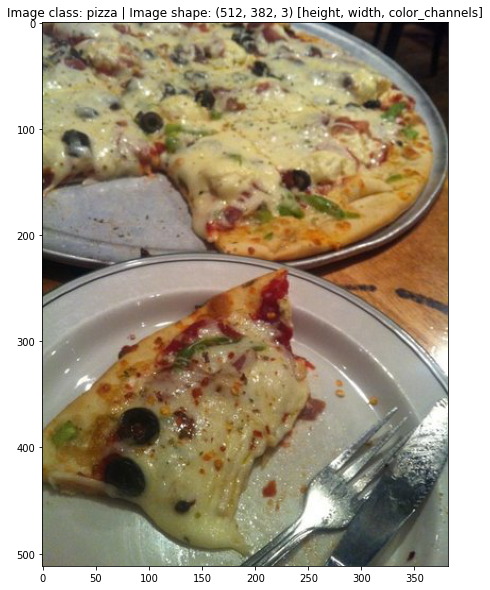

In [21]:
random.seed(23)
image_path_list=list(image_path.glob("*/*/*.jpg")) #list of all the image paths
rando=random.choice(image_path_list) #rando selection of a path

imgclass=rando.parent.stem #get class from directory name
img=Image.open(rando)

#plot
img_arr=np.asarray(img)
plt.figure(figsize=(10, 10))
plt.imshow(img_arr)
plt.title(f"Image class: {imgclass} | Image shape: {img_arr.shape} [height, width, color_channels]")

Transforms:

In [ ]:
tsfm=transforms.compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.4),
    transforms.ToTensor()
])